In [1]:
import lane_detection_pipeline as pipeline

In [2]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
img_lane = cv2.imread('dataSet3/image_1628786135241.jpg')
# img_lane = cv2.imread('dataSet4/image_1629490720622.jpg')

(240, 320, 3)


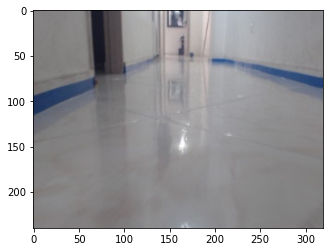

In [4]:
plt.imshow(cv2.cvtColor(img_lane, cv2.COLOR_BGR2RGB))

print(img_lane.shape)

In [5]:
# (height, width) = img_lane.shape[:2]

# mid_offset = 80
# bottom_offset = 0
# x_offset = 0
# y_bottom_offset = 140
# y_top_offset = 50

# mid_y = height // 2
# mid_width = width // 2

# left_bottom = (0 + bottom_offset + x_offset, height - y_bottom_offset)
# right_bottom = (width - bottom_offset + x_offset, height - y_bottom_offset)
# apex1 = ( mid_width - mid_offset + x_offset, mid_y - y_top_offset)
# apex2 = ( mid_width + mid_offset + x_offset, mid_y - y_top_offset)
# corners = [left_bottom, right_bottom, apex2, apex1]

In [6]:
(height, width) = img_lane.shape[:2]
mid_offset = 20
bottom_offset = 0
x_offset = 0
y_bottom_offset = 130
y_top_offset = 65

mid_y = height // 2
mid_width = width // 2

left_bottom = (0 + bottom_offset + x_offset, height - y_bottom_offset)
right_bottom = (width - bottom_offset + x_offset, height - y_bottom_offset)
apex1 = ( mid_width - mid_offset + x_offset, mid_y - y_top_offset)
apex2 = ( mid_width + mid_offset + x_offset, mid_y - y_top_offset)
corners = [left_bottom, right_bottom, apex2, apex1]

lane_processing = pipeline.LaneDetection(corners)

[(0, 110), (320, 110), (180, 55), (140, 55)]


## 1. Select channel

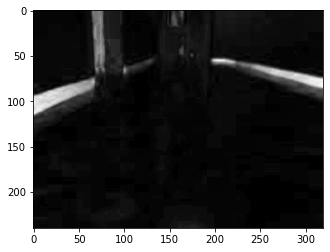

In [7]:
s_channel = lane_processing._select_channel(img_lane)
plt.imshow(s_channel, cmap='gray')

## 2.Binary Operation

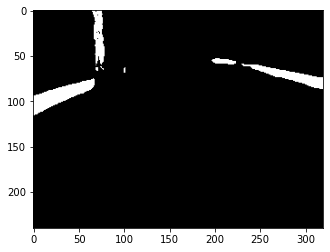

In [8]:
binary_img = lane_processing._binary(s_channel, 80, 255)
plt.imshow(binary_img, cmap='gray')

## Draw polygon region for perspective change

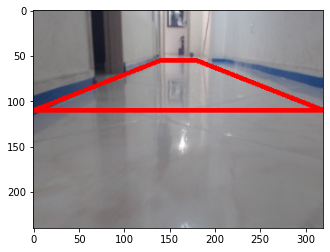

In [9]:
draw_region = pipeline.draw_region(img_lane, corners)
plt.imshow(cv2.cvtColor(draw_region, cv2.COLOR_BGR2RGB))

## 3.Change view perspective for binary operation (Bird View)

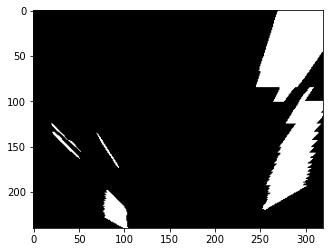

In [10]:
inv_corners = corners[::-1]
bird_view, M = lane_processing._bird_view(binary_img)
plt.imshow(bird_view, cmap='gray')

## 4.Apply lines segmentation

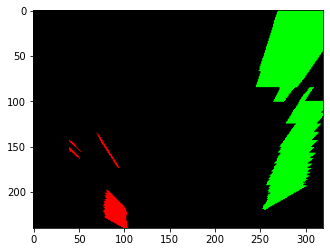

In [11]:
leftx, lefty, rightx, righty, out_img = lane_processing._find_lane_pixels(bird_view)
plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))

## 5. Revert perspective and add to original Image

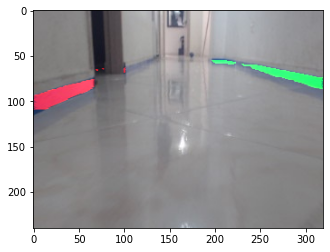

In [12]:
out_img = lane_processing._segmentation_lane_detection(bird_view, img_lane)
plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))

# Complete pipeline as a single function

Processing Time: 0.004358530044555664


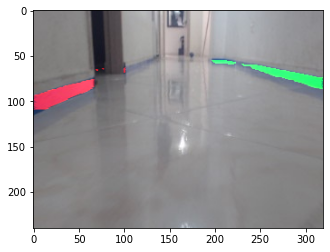

In [13]:
start = time.time()
result = lane_processing.process_image(img_lane)
end = time.time()
print("Processing Time: {}".format(end - start))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))